In [3]:
import cv2 as cv
import os
import caer
import canaro
import numpy as np 
import gc

In [4]:
IMG_SIZE = (80,80)
channels = 1
char_path = r"C:\Users\pkrpr\OneDrive\Desktop\pinnacle tasks\simpsonRecognisier\simpson_characters\simpsons_dataset"

In [5]:
char_dict = {}
for i in os.listdir(char_path) :
    char_dict[i] = len(os.listdir(os.path.join(char_path,i)))

In [6]:
char_dict = caer.sort_dict(char_dict , descending= True)

In [7]:
characters = []
count = 0
for i in char_dict :
    characters.append(i[0])
    count+=1
    if count >=10:
        break

In [8]:
train_set = caer.preprocess_from_dir(char_path , characters , IMG_SIZE , channels , isShuffle= True )

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 0.006575584411621094s
[INFO] At 1000 files
[INFO] 1454 files found in 0.003998756408691406s
[INFO] At 1000 files
[INFO] 1452 files found in 0.009097814559936523s
[INFO] At 1000 files
[INFO] 1354 files found in 0.007593631744384766s
[INFO] At 1000 files
[INFO] 1342 files found in 0.007198333740234375s
[INFO] At 1000 files
[INFO] 1291 files found in 0.008001327514648438s
[INFO] At 1000 files
[INFO] 1206 files found in 0.007097721099853516s
[INFO] At 1000 files
[INFO] 1194 files found in 0.006850242614746094s
[INFO] At 1000 files
[INFO] 1193 files found in 0.0070002079010009766s
[INFO] At 1000 files
[INFO] 1079 files found in 0.007000923156738281s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 0m 19s


13811


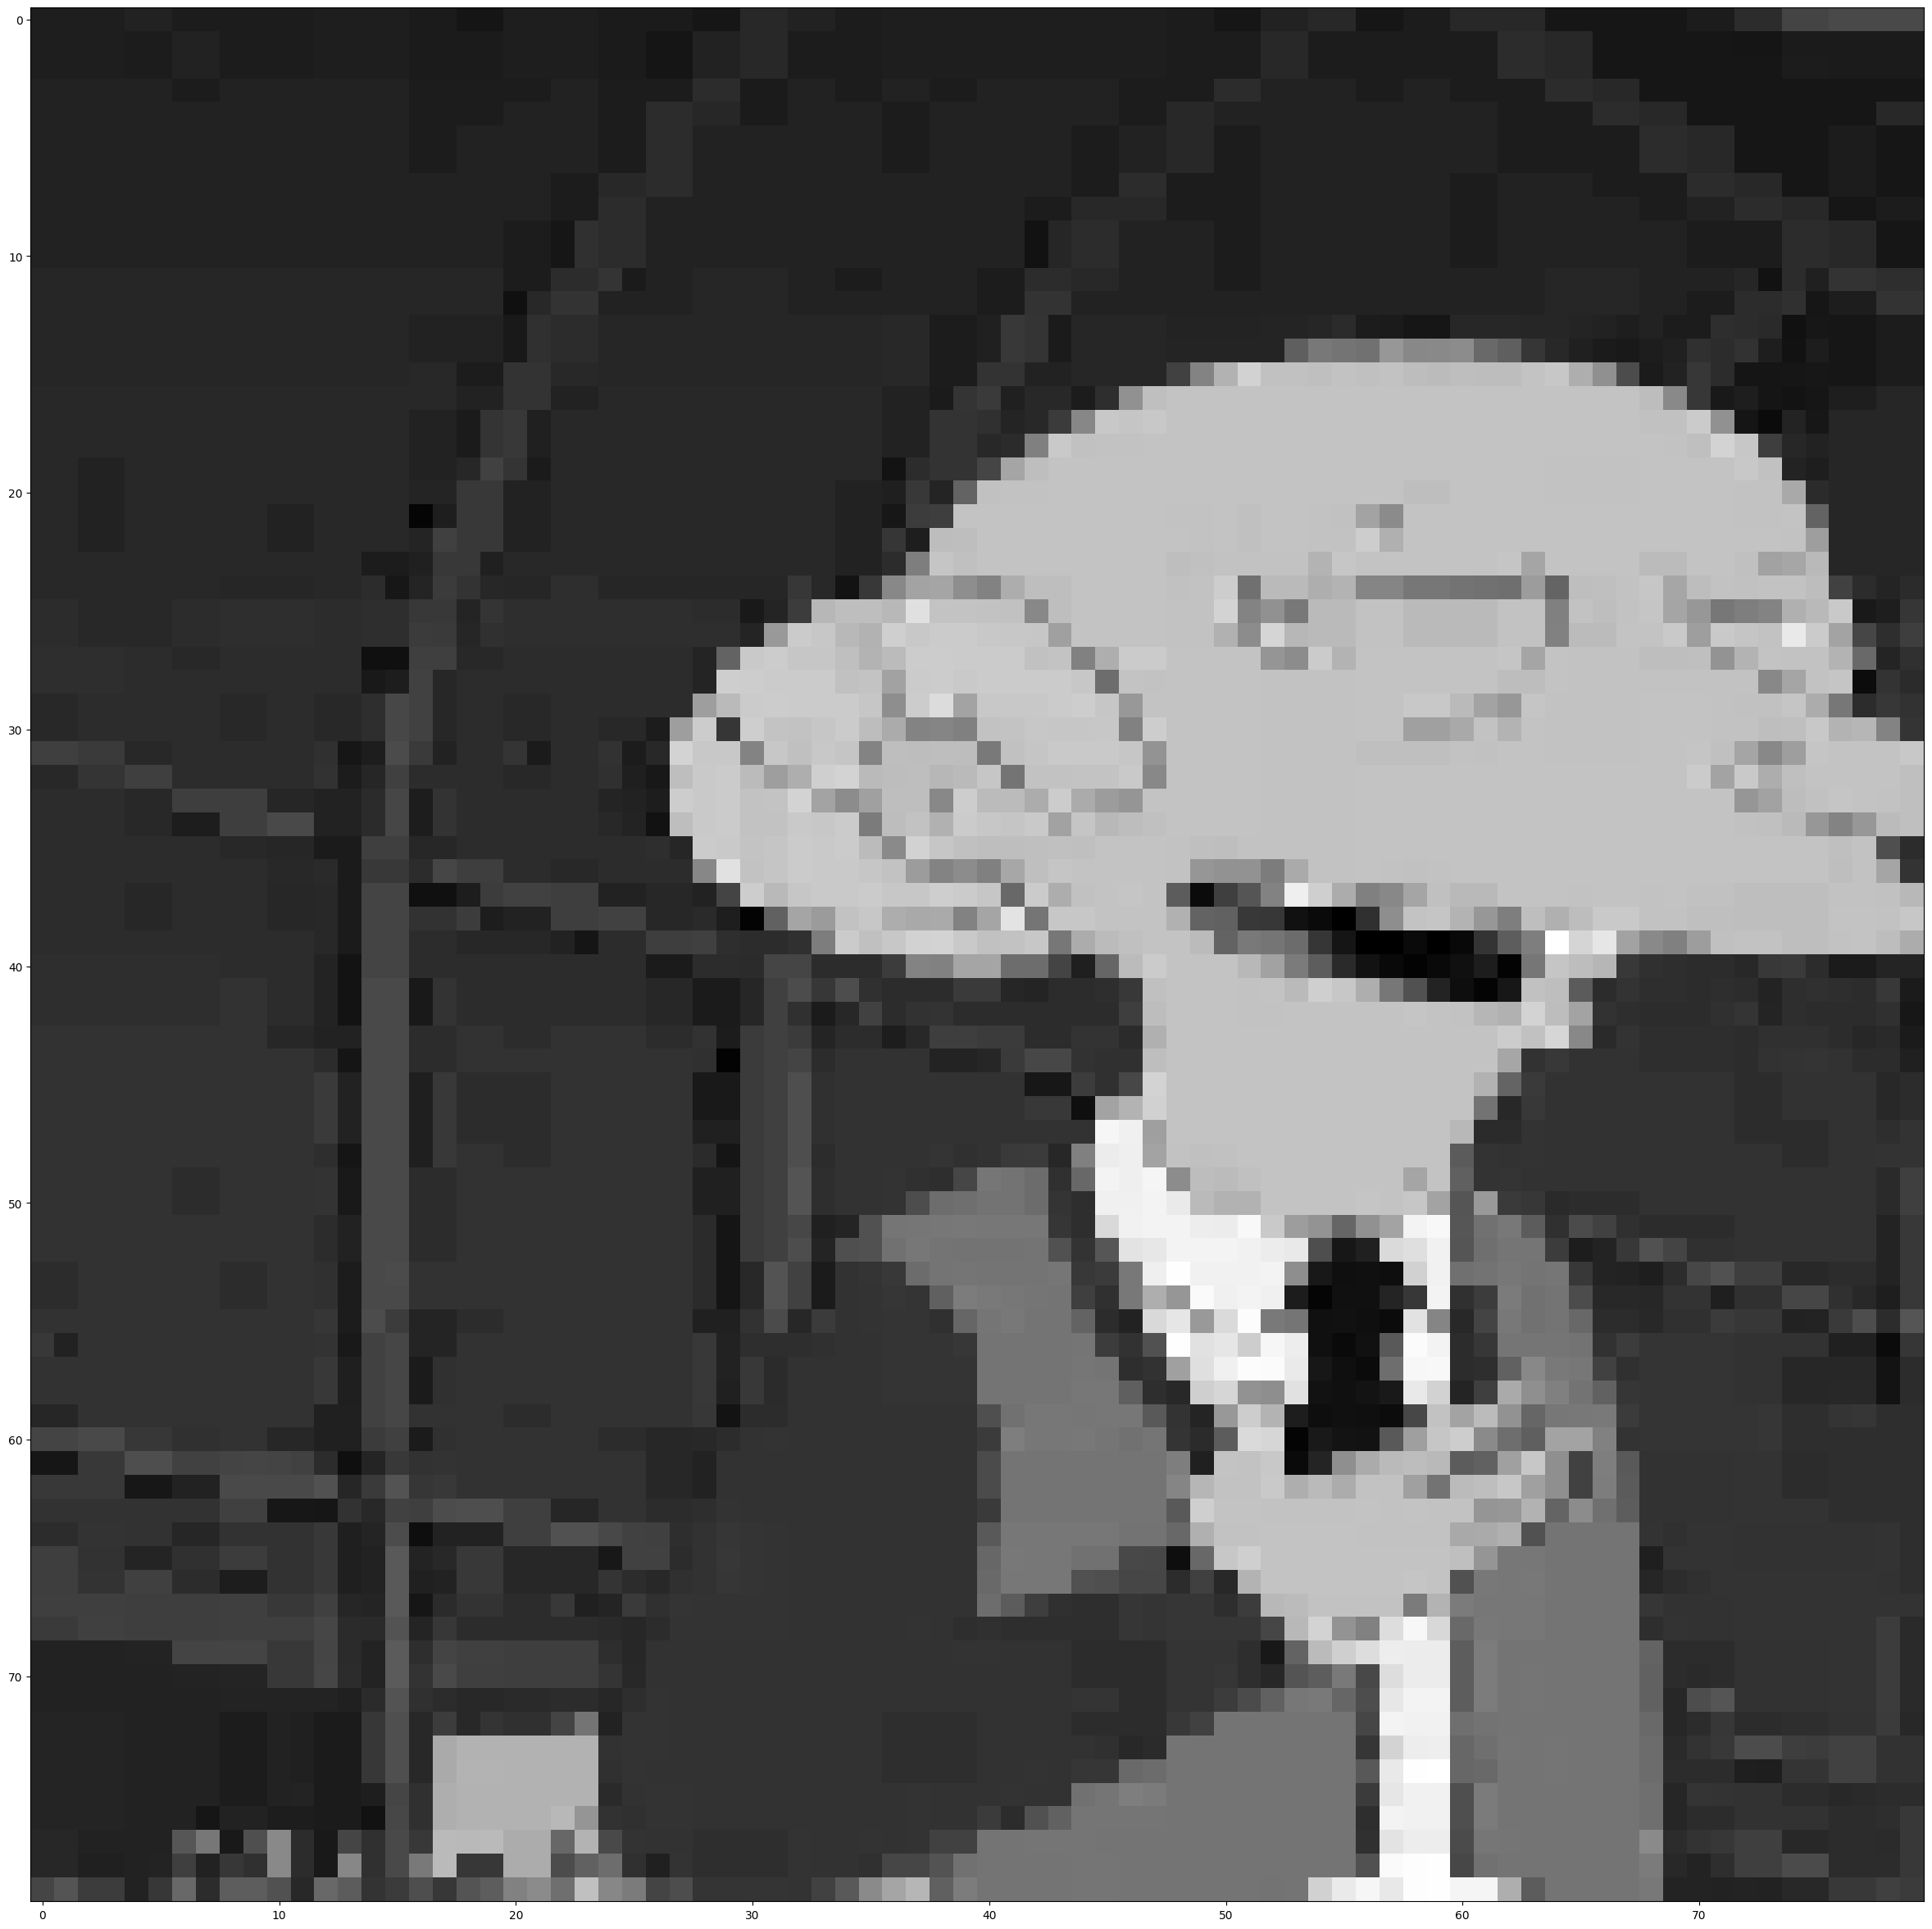

In [9]:
print(len(train_set))
import matplotlib.pyplot as plt
plt.figure(figsize=(30,30))
plt.imshow(train_set[0][0] , cmap='gray')
plt.show()


In [10]:
features , labels = caer.sep_train(train_set  ,IMG_SIZE )

In [11]:
from tensorflow.keras.utils import to_categorical
features = caer.normalize(features)
labels = to_categorical(labels,len(characters))

In [12]:
x_train , x_val , y_train , y_val = caer.train_val_split(features , labels , 0.2)

In [ ]:
del train_set
del features
del labels
gc.collect()

'del train_set\ndel features\ndel labels\ngc.collect()'

In [14]:
batchsize = 32
epochs = 10

In [ ]:
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train , batchsize)

In [16]:
model = canaro.models.createSimpsonsModel(
    IMG_SIZE, channels, len(characters),
    decay=1e-6,
    learning_rate=0.001,
    momentum=0.9,
    nesterov=True
)

c:\Users\pkrpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 80, 80, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 78, 78, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 39, 39, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 39, 39, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 18, 18, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │    16,778,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,591,274 (67.11 MB)

 Trainable params: 17,591,274 (67.11 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
training = model.fit(
    train_gen,
    steps_per_epoch=len(x_train) // batchsize,
    epochs=epochs,
    validation_data= (x_val , y_val) ,
    validation_steps=len(y_val) // batchsize
)

Epoch 1/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 96s 279ms/step - accuracy: 0.1595 - loss: 0.3251 - val_accuracy: 0.1653 - val_loss: 0.3383
Epoch 2/10


c:\Users\pkrpr\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


345/345 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.0938 - loss: 0.3312 - val_accuracy: 0.1653 - val_loss: 0.3383
Epoch 3/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 95s 275ms/step - accuracy: 0.1574 - loss: 0.3249 - val_accuracy: 0.1653 - val_loss: 0.3363
Epoch 4/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1875 - loss: 0.3305 - val_accuracy: 0.1653 - val_loss: 0.3364
Epoch 5/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 99s 286ms/step - accuracy: 0.1657 - loss: 0.3235 - val_accuracy: 0.1653 - val_loss: 0.3364
Epoch 6/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.0938 - loss: 0.3328 - val_accuracy: 0.1653 - val_loss: 0.3364
Epoch 7/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 97s 280ms/step - accuracy: 0.1586 - loss: 0.3239 - val_accuracy: 0.1653 - val_loss: 0.3368
Epoch 8/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.1562 - loss: 0.3227 - val_accuracy: 0.1653 - val_loss: 0.3369
Epoch 9/10
345/345 ━━━━━━━━━━━━━━━━━━━━ 97s 282ms/step - accuracy: 0.1612 - loss: 0.3238 - val_accurac

In [22]:
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [45]:
import os
import random as rn

test_path = r"C:\Users\pkrpr\OneDrive\Desktop\pinnacle tasks\simpsonRecognisier\simpson_characters\kaggle_simpson_testset\kaggle_simpson_testset"
objects = {}
count = 0

files = os.listdir(test_path)
rn.shuffle(files)

for chars in files:
    objects.update({chars: os.path.join(test_path, chars)})
    count += 1
    if count >= 10:
        break

images = []
image_names = []
for key, value in objects.items():
    images.append(value)
    image_names.append(key)



In [43]:
def prepare(img) :
    img = cv.cvtColor(img , cv.COLOR_BGR2GRAY)
    img = cv.resize(img , IMG_SIZE)
    img = caer.reshape(img,IMG_SIZE ,1)
    return img 

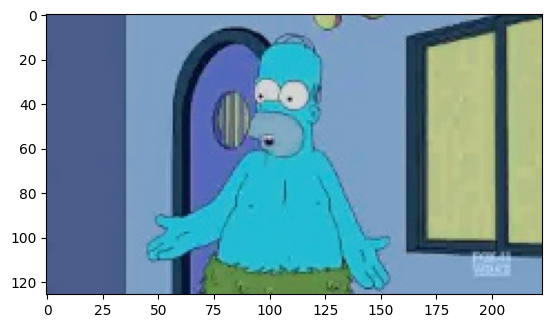

Actual Name :  homer_simpson_7.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Name :  homer_simpson


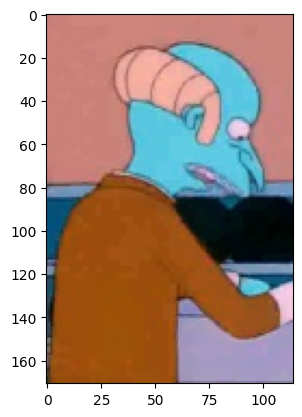

Actual Name :  charles_montgomery_burns_37.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Name :  lisa_simpson


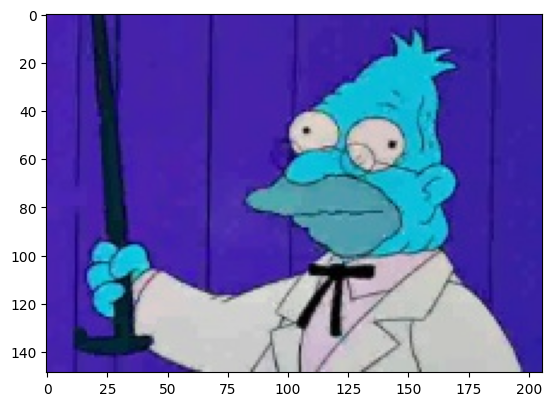

Actual Name :  abraham_grampa_simpson_43.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Name :  homer_simpson


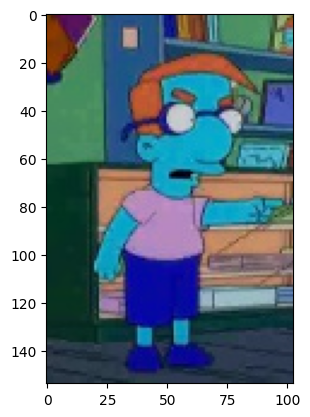

Actual Name :  milhouse_van_houten_43.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Name :  homer_simpson


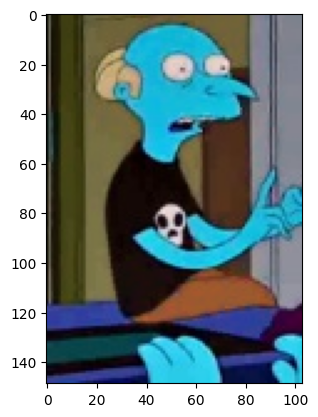

Actual Name :  charles_montgomery_burns_28.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Name :  homer_simpson


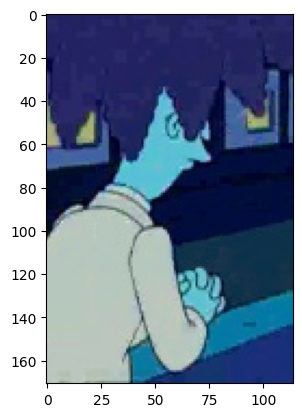

Actual Name :  sideshow_bob_48.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicted Name :  homer_simpson


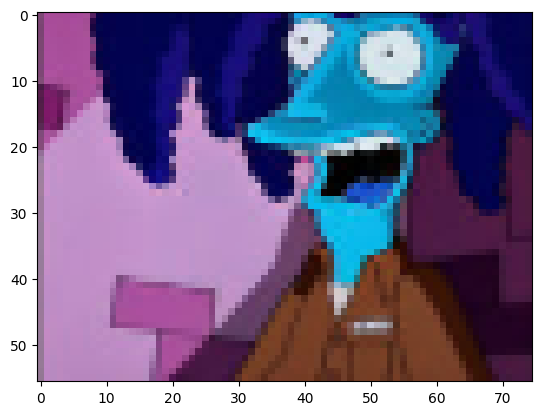

Actual Name :  sideshow_bob_15.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Predicted Name :  homer_simpson


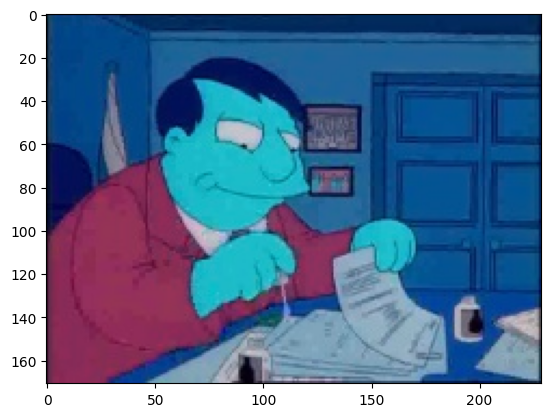

Actual Name :  mayor_quimby_23.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Name :  homer_simpson


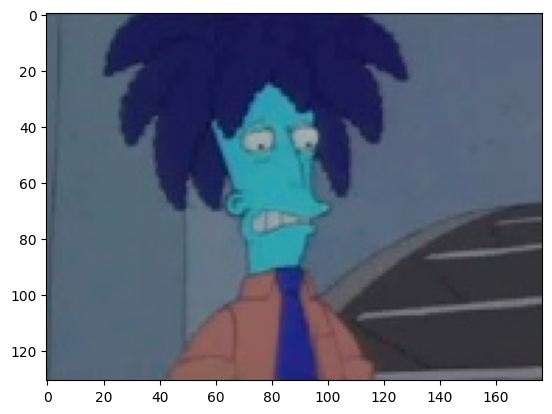

Actual Name :  sideshow_bob_4.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Predicted Name :  homer_simpson


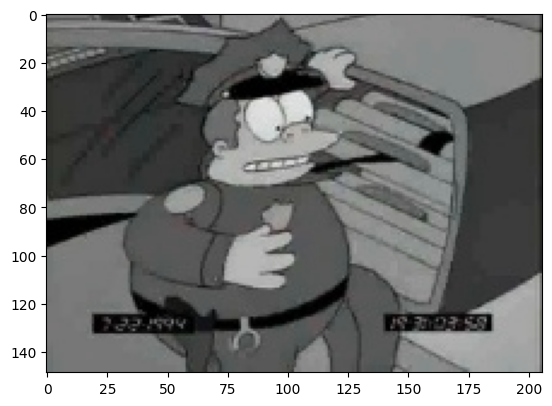

Actual Name :  chief_wiggum_13.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Name :  homer_simpson


In [46]:
import time as t
plt.figure()
for i in range(len(image_names)) :
    img = cv.imread(images[i])
    plt.imshow(img)
    plt.show()
    print("Actual Name : " ,image_names[i])
    prediction = model.predict(prepare(img))
    print("Predicted Name : " ,characters[np.argmax(prediction[0])])

